---
## Lake Michigan Waves

**Objective     :** Predict wave height based on wave period (time between waves)<br>
**Data Source   :** https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core import display as ICD

In [2]:
data = pd.read_csv('Beach_Water_Quality_-_Automated_Sensors.csv')
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,3.15,NaN,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,2.18,NaN,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,1.92,NaN,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,1.81,NaN,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,0.03,NaN,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900
...,...,...,...,...,...,...,...,...,...,...
40702,Rainbow Beach,10/01/2015 07:00:00 AM,14.1,0.00,NaN,-99999.992,-100000.0,10.4,10/01/2015 7:00 AM,RainbowBeach201510010700
40703,63rd Street Beach,09/13/2015 10:00:00 PM,18.9,29.55,NaN,-99999.992,-100000.0,5.5,09/13/2015 10:00 PM,63rdStreetBeach201509132200
40704,Calumet Beach,09/20/2016 01:00:00 PM,21.7,3.15,NaN,0.389,3.0,9.4,09/20/2016 1:00 PM,CalumetBeach201609201300
40705,Montrose Beach,09/14/2016 07:00:00 PM,21.9,0.01,NaN,0.360,3.0,9.4,09/14/2016 7:00 PM,MontroseBeach201609141900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40707 entries, 0 to 40706
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   40707 non-null  object 
 1   Measurement Timestamp        40707 non-null  object 
 2   Water Temperature            40707 non-null  float64
 3   Turbidity                    40707 non-null  float64
 4   Transducer Depth             10034 non-null  float64
 5   Wave Height                  40480 non-null  float64
 6   Wave Period                  40480 non-null  float64
 7   Battery Life                 40707 non-null  float64
 8   Measurement Timestamp Label  40707 non-null  object 
 9   Measurement ID               40707 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.1+ MB


Missing values :

Beach Name                         0
Measurement Timestamp              0
Water Temperature                  0
Turbidity                          0
Transducer Depth               30673
Wave Height                      227
Wave Period                      227
Battery Life                       0
Measurement Timestamp Label        0
Measurement ID                     0
dtype: int64


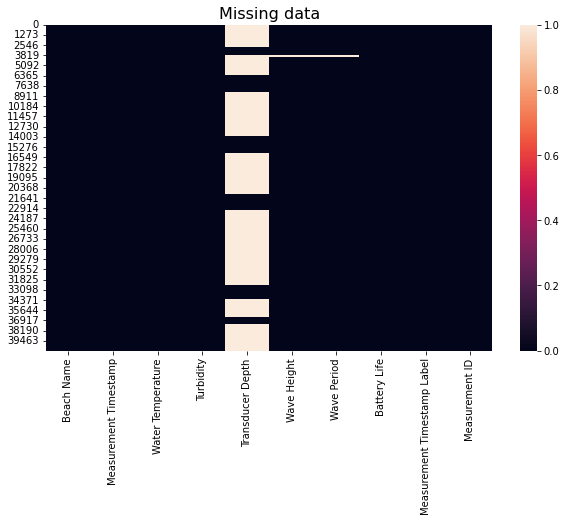

In [4]:
# Identify existence of missing values

print("Missing values :\n")
print(data.isnull().sum())

plt.figure(figsize=(10,6))
plt.title('Missing data',fontsize=16)
sns.heatmap(data=data.isnull());

In [5]:
# A quick pre-processing based on some exceptions

data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])
'''
Measurement Timestamp Label - Duplicate of Measurement Timestamp
Measurement ID              - Unique values
Transducer Depth            - Mostly with missing values
'''
data = data.drop(columns=['Measurement Timestamp Label',
                          'Measurement ID',
                          'Transducer Depth']).dropna()
data = data[data['Wave Period'] != -100000. ].reset_index(drop=True) # exception
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,Calumet Beach,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0
1,Ohio Street Beach,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8
2,Ohio Street Beach,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3
3,Ohio Street Beach,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3
4,Ohio Street Beach,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4
...,...,...,...,...,...,...,...
39824,Ohio Street Beach,2021-08-27 12:00:00,24.6,1.31,0.206,5.0,11.0
39825,Ohio Street Beach,2021-08-27 16:00:00,24.9,0.80,0.205,5.0,11.0
39826,Calumet Beach,2016-09-20 13:00:00,21.7,3.15,0.389,3.0,9.4
39827,Montrose Beach,2016-09-14 19:00:00,21.9,0.01,0.360,3.0,9.4


In [6]:
data.to_csv("Filtered_data.csv")

**Wave Height vs Wave Period based on Beaches**

All beaches : 
['Calumet Beach', 'Ohio Street Beach', 'Osterman Beach', '63rd Street Beach', 'Montrose Beach', 'Rainbow Beach']


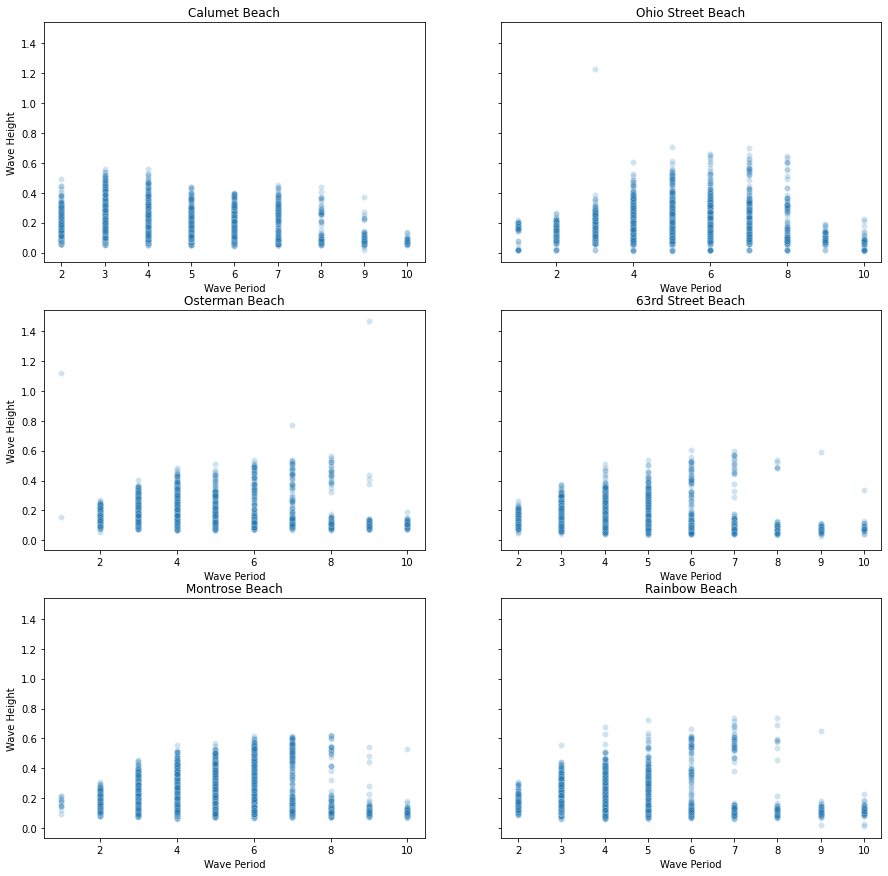

In [7]:
beaches = list(data['Beach Name'].unique())
print("All beaches : ")
print(beaches)

fig,axes = plt.subplots(3,2,figsize=(15,15),sharey=True)
axes=list(axes.reshape(-1))
for i,j in zip(beaches,axes):
    temp=data[data['Beach Name']==i].copy()
    j.set_title(i,fontsize=12)
    sns.scatterplot(x=temp['Wave Period'],y=temp['Wave Height'],ax=j,alpha=0.2)

**Testing prediction with 4 models**
1. **Univariate linear model** - Wave Period vs Wave Height
2. **Polynomial model** - Wave Period vs Wave Height
3. **Univariate linear model** - Beach vs Wave Height
4. { Wave Period (**linear/polynomial**) + Beach (**linear**) } vs Wave Height

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.compose import make_column_transformer


In [9]:
# 1. (Linear) Wave Period vs Wave Height

X = data[['Wave Period']].copy()
y = data[['Wave Height']].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# with pipeline
m1 = Pipeline([
    ("lr",LinearRegression())
])

scores = cross_val_score(m1,X_train,y_train,cv=10)
print("\nCross val score : ",scores.mean())
m1.fit(X_train,y_train)
print("Test score      : ",m1.score(X_test,y_test))

(31863, 1) (31863, 1) (7966, 1) (7966, 1)

Cross val score :  0.003070271293635163
Test score      :  0.003193656846955828


In [10]:
# 2. (Polynomial) Wave Period vs Wave Height

X = data[['Wave Period']].copy()
y = data[['Wave Height']].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# input without pipeline
pol = PolynomialFeatures(degree=2,include_bias=False)
inp = pol.fit_transform(X_train)
print("\nTransformed Input : ")
ICD.display(pd.DataFrame(inp,columns=pol.get_feature_names(['Period'])))

# with pipeline
m2 = Pipeline([
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("lr",LinearRegression())
])

scores = cross_val_score(m2,X_train,y_train,cv=10)
print("\n\nCross val score : ",scores.mean())
m2.fit(X_train,y_train)
print("Test score      : ",m2.score(X_test,y_test))

(31863, 1) (31863, 1) (7966, 1) (7966, 1)

Transformed Input : 


,Period,Period^2
0,4.0,16.0
1,3.0,9.0
2,5.0,25.0
3,4.0,16.0
4,3.0,9.0
...,...,...
31858,4.0,16.0
31859,4.0,16.0
31860,4.0,16.0
31861,3.0,9.0




Cross val score :  0.04684291523021862
Test score      :  0.052702615166982825


In [11]:
# 3. (Linear) Beach vs Wave Height

X = data[['Beach Name']].copy()
y = data[['Wave Height']].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# input without pipeline
'''
'Calumet Beach', 'Ohio Street Beach', 'Osterman Beach', '63rd Street Beach', 'Montrose Beach', 'Rainbow Beach'
'''
oh = OneHotEncoder()
inp = oh.fit_transform(X_train)
print("\nTransformed Input : ")

ICD.display(pd.DataFrame(inp.toarray()))

# with pipeline
m3 = Pipeline([
    ("oh",OneHotEncoder()),
    ("lr",LinearRegression())])

scores = cross_val_score(m3,X_train,y_train,cv=10)
print("\n\nCross val score : ",scores.mean())
m3.fit(X_train,y_train)
print("Test score      : ",m3.score(X_test,y_test))

(31863, 1) (31863, 1) (7966, 1) (7966, 1)

Transformed Input : 


,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
31858,0.0,1.0,0.0,0.0,0.0,0.0
31859,0.0,1.0,0.0,0.0,0.0,0.0
31860,0.0,0.0,0.0,0.0,0.0,1.0
31861,0.0,0.0,0.0,1.0,0.0,0.0




Cross val score :  0.04676563040346919
Test score      :  0.04551809748903446


In [12]:
# 4. (Polynomial) Wave Period & (Linear) Beach vs Wave Height

X = data[['Beach Name','Wave Period']].copy()
y = data[['Wave Height']].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# with pipeline
m4 = Pipeline([
    ("both",make_column_transformer((OneHotEncoder(),['Beach Name']),
                                    (PolynomialFeatures(degree=2,include_bias=False),['Wave Period']))),
    ("lr",LinearRegression())])
print("\nInput Data : ")
ICD.display(pd.DataFrame(m4['both'].fit_transform(X_train),columns=m4['both'].get_feature_names()))

scores = cross_val_score(m4,X_train,y_train,cv=10)
print("\n\nCross val score : ",scores.mean())
m4.fit(X_train,y_train)
print("Test score      : ",m4.score(X_test,y_test))

(31863, 2) (31863, 1) (7966, 2) (7966, 1)

Input Data : 


,onehotencoder__x0_63rd Street Beach,onehotencoder__x0_Calumet Beach,onehotencoder__x0_Montrose Beach,onehotencoder__x0_Ohio Street Beach,onehotencoder__x0_Osterman Beach,onehotencoder__x0_Rainbow Beach,polynomialfeatures__x0,polynomialfeatures__x0^2
0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,16.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0
2,0.0,0.0,0.0,1.0,0.0,0.0,5.0,25.0
3,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.0
4,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0
...,...,...,...,...,...,...,...,...
31858,0.0,1.0,0.0,0.0,0.0,0.0,4.0,16.0
31859,0.0,1.0,0.0,0.0,0.0,0.0,4.0,16.0
31860,0.0,0.0,0.0,0.0,0.0,1.0,4.0,16.0
31861,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0




Cross val score :  0.08708175305398744
Test score      :  0.09203855756822188


**Dumping the 4 models**

In [13]:
import pickle

In [14]:
with open("Models/LinearPeriod_vs_Height.pkl",'wb') as f:
    pickle.dump(m1,f)
with open("Models/PolyPeriod_vs_Height.pkl",'wb') as f:
    pickle.dump(m2,f)
with open("Models/Beach_vs_Height.pkl",'wb') as f:
    pickle.dump(m3,f)
with open("Models/PolyPeriod_Beach_vs_Height.pkl",'wb') as f:
    pickle.dump(m4,f)
    

In [15]:
# Test

m1 = pickle.load(open('Models/LinearPeriod_vs_Height.pkl', 'rb'))
m2 = pickle.load(open('Models/PolyPeriod_vs_Height.pkl', 'rb'))
m3 = pickle.load(open('Models/Beach_vs_Height.pkl', 'rb'))
m4 = pickle.load(open('Models/PolyPeriod_Beach_vs_Height.pkl', 'rb'))
print(m1,m2,m3,m4,sep='\n')

Pipeline(steps=[('lr', LinearRegression())])
Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])
Pipeline(steps=[('oh', OneHotEncoder()), ('lr', LinearRegression())])
Pipeline(steps=[('both',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Beach Name']),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['Wave Period'])])),
                ('lr', LinearRegression())])
